In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [18]:
df = pd.read_csv("Marital-satisfaction_Data (1).csv")

In [19]:
df.fillna(0, inplace=True)

In [20]:
## Q1: Personal collectivism high but social perception low → Romantic involvement high?
df["Personal_Collectivism"] = df[["Scale5", "Scale6", "Scale7", "Scale8"]].mean(axis=1)
df["Societal_Collectivism"] = df[["Scale1", "Scale2", "Scale3", "Scale4"]].mean(axis=1)
df["Low_Society_High_Personal"] = (df["Personal_Collectivism"] >= 5) & (df["Societal_Collectivism"] <= 3)
df["Romantic_Involvement"] = df[["Love3", "Love4", "Love5"]].mean(axis=1) >= 1

In [21]:
## Q2: No children + tertiary education → High marital satisfaction?
df["No_Children"] = df["children"] == 0
df["Tertiary_Edu"] = df["Education"] >= 4
df["High_Satisfaction"] = df["Material_status"] >= 4

In [22]:
## Q3: Religious + Financially struggling → Still emotional bonding?
df["Religious"] = df["Religiosity"] >= 5
df["Struggling"] = df["Material_status"] >= 4
df["Cuddling_Strong"] = df["Love5"] >= 1
df["Bonding_Strong"] = df["Cuddling_Strong"]  # Simplified without Respect

In [23]:
# Q4: Supports elder cohabitation + long marriage
df["Support_Elders"] = df["Scale7"] >= 5
df["Long_Marriage"] = df["Marriage_years"] >= 10
df["Elder_Support_LongMarriage"] = df["Support_Elders"] & df["Long_Marriage"]

In [24]:
#Build transaction list
transactions = []

for _, row in df.iterrows():
    items = []
    if row["Low_Society_High_Personal"]:
        items.append("Low_Society_High_Personal")
    if row["Romantic_Involvement"]:
        items.append("Romantic")
    if row["No_Children"]:
        items.append("No_Children")
    if row["Tertiary_Edu"]:
        items.append("Tertiary_Edu")
    if row["High_Satisfaction"]:
        items.append("High_Satisfaction")
    if row["Religious"]:
        items.append("Religious")
    if row["Struggling"]:
        items.append("Struggling")
    if row["Bonding_Strong"]:
        items.append("Emotional_Bonding")
    if row["Elder_Support_LongMarriage"]:
        items.append("Elder_Support_LongMarriage")
    transactions.append(items)

In [25]:
# Encode transactions
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_te = pd.DataFrame(te_array, columns=te.columns_)

In [26]:
# Apply Apriori algorithm
frequent_itemsets = apriori(df_te, min_support=0.1, use_colnames=True)

In [27]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

C:\Users\melvi\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


In [28]:
#Show top 10 rules
top_rules = rules.sort_values(by="support", ascending=False).head(10)
print(top_rules)

                          antecedents                        consequents  \
8                 (Emotional_Bonding)                         (Romantic)   
9                          (Romantic)                (Emotional_Bonding)   
11                     (Tertiary_Edu)                (Emotional_Bonding)   
57  (Emotional_Bonding, Tertiary_Edu)                         (Romantic)   
20                         (Romantic)                     (Tertiary_Edu)   
56      (Emotional_Bonding, Romantic)                     (Tertiary_Edu)   
58           (Romantic, Tertiary_Edu)                (Emotional_Bonding)   
59                (Emotional_Bonding)           (Romantic, Tertiary_Edu)   
60                         (Romantic)  (Emotional_Bonding, Tertiary_Edu)   
61                     (Tertiary_Edu)      (Emotional_Bonding, Romantic)   

    antecedent support  consequent support   support  confidence  lift  \
8             1.000000            1.000000  1.000000    1.000000   1.0   
9             1

C:\Users\melvi\AppData\Local\Temp\ipykernel_12728\4146046620.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="support", y="Rule", data=top_rules, palette="viridis")


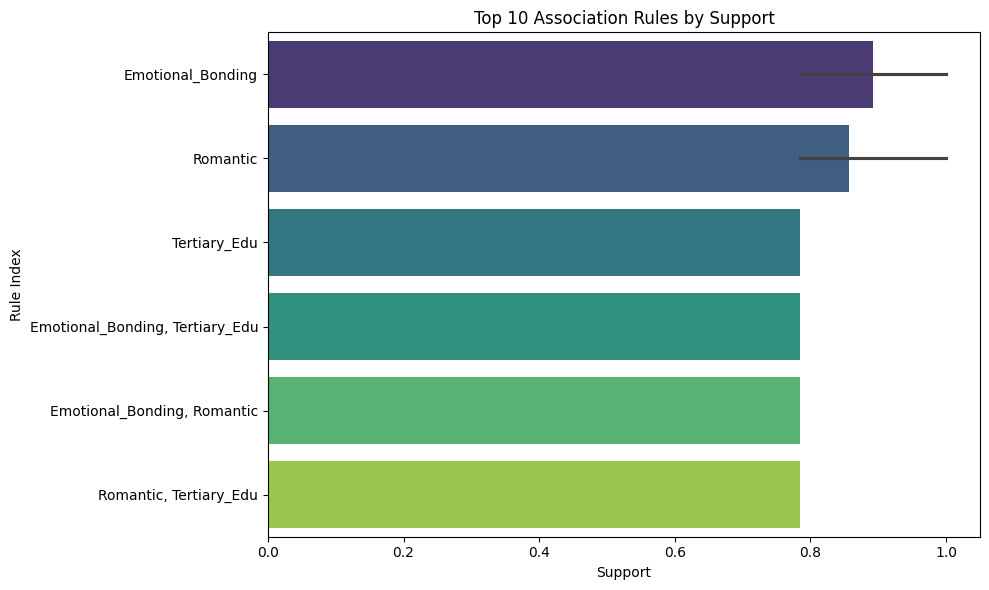

In [39]:
#Visualize
top_rules = rules.sort_values(by="support", ascending=False).head(10).copy()
top_rules["Rule"] = top_rules["antecedents"].apply(lambda x: ', '.join(list(x)))

plt.figure(figsize=(10, 6))
sns.barplot(x="support", y="Rule", data=top_rules, palette="viridis")

plt.title("Top 10 Association Rules by Support")
plt.xlabel("Support")
plt.ylabel("Rule Index")
plt.tight_layout()
plt.show()

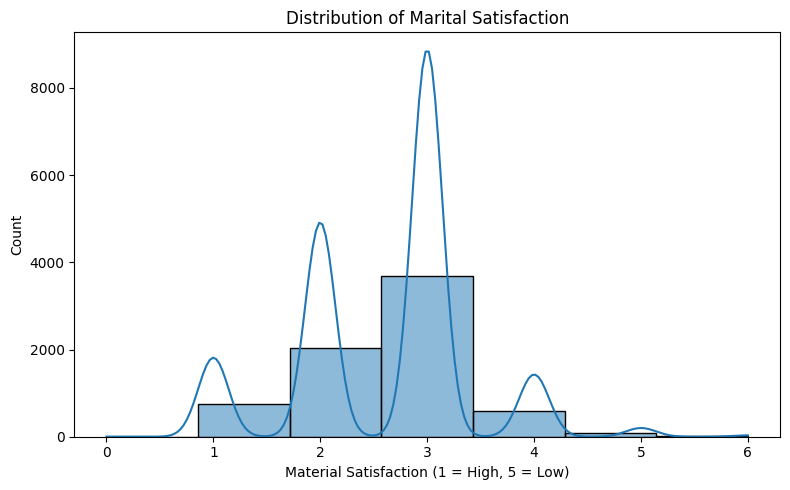

In [30]:
# Histogram: Marital satisfaction
plt.figure(figsize=(8, 5))
sns.histplot(df["Material_status"], bins=7, kde=True)
plt.title("Distribution of Marital Satisfaction")
plt.xlabel("Material Satisfaction (1 = High, 5 = Low)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

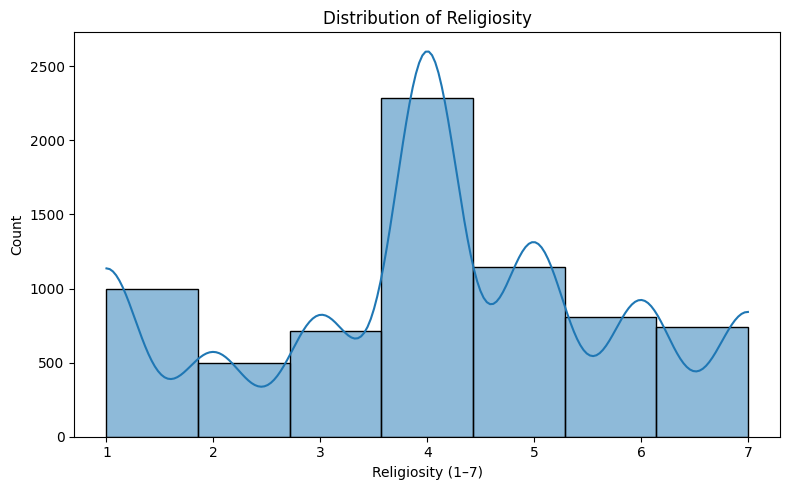

In [31]:
# Histogram: Religiosity
plt.figure(figsize=(8, 5))
sns.histplot(df["Religiosity"], bins=7, kde=True)
plt.title("Distribution of Religiosity")
plt.xlabel("Religiosity (1–7)")
plt.tight_layout()
plt.show()

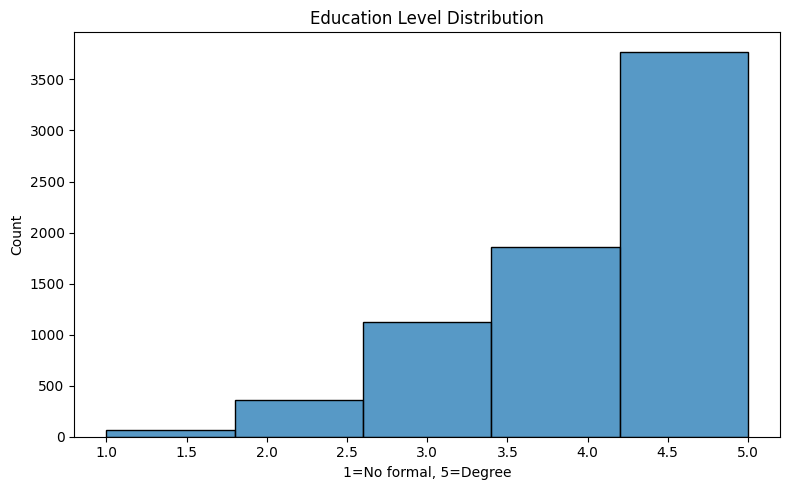

In [32]:
# Histogram: Education
plt.figure(figsize=(8, 5))
sns.histplot(df["Education"], bins=5)
plt.title("Education Level Distribution")
plt.xlabel("1=No formal, 5=Degree")
plt.tight_layout()
plt.show()

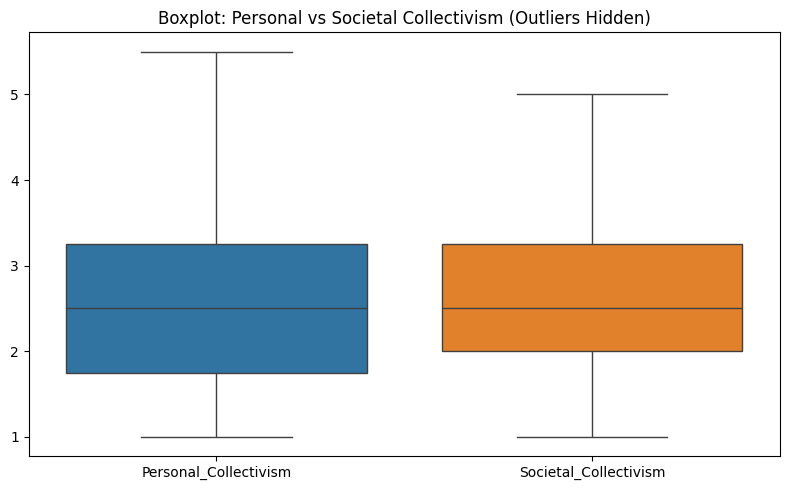

In [44]:
# Boxplot: Personal vs Societal Collectivism
df["Personal_Collectivism"] = df[["Scale5", "Scale6", "Scale7", "Scale8"]].mean(axis=1)
df["Societal_Collectivism"] = df[["Scale1", "Scale2", "Scale3", "Scale4"]].mean(axis=1)
df["Low_Society_High_Personal"] = (df["Personal_Collectivism"] >= 5) & (df["Societal_Collectivism"] <= 3)

plt.figure(figsize=(8, 5))
sns.boxplot(data=df[["Personal_Collectivism", "Societal_Collectivism"]], showfliers=False)
plt.title("Boxplot: Personal vs Societal Collectivism (Outliers Hidden)")
plt.tight_layout()
plt.show()

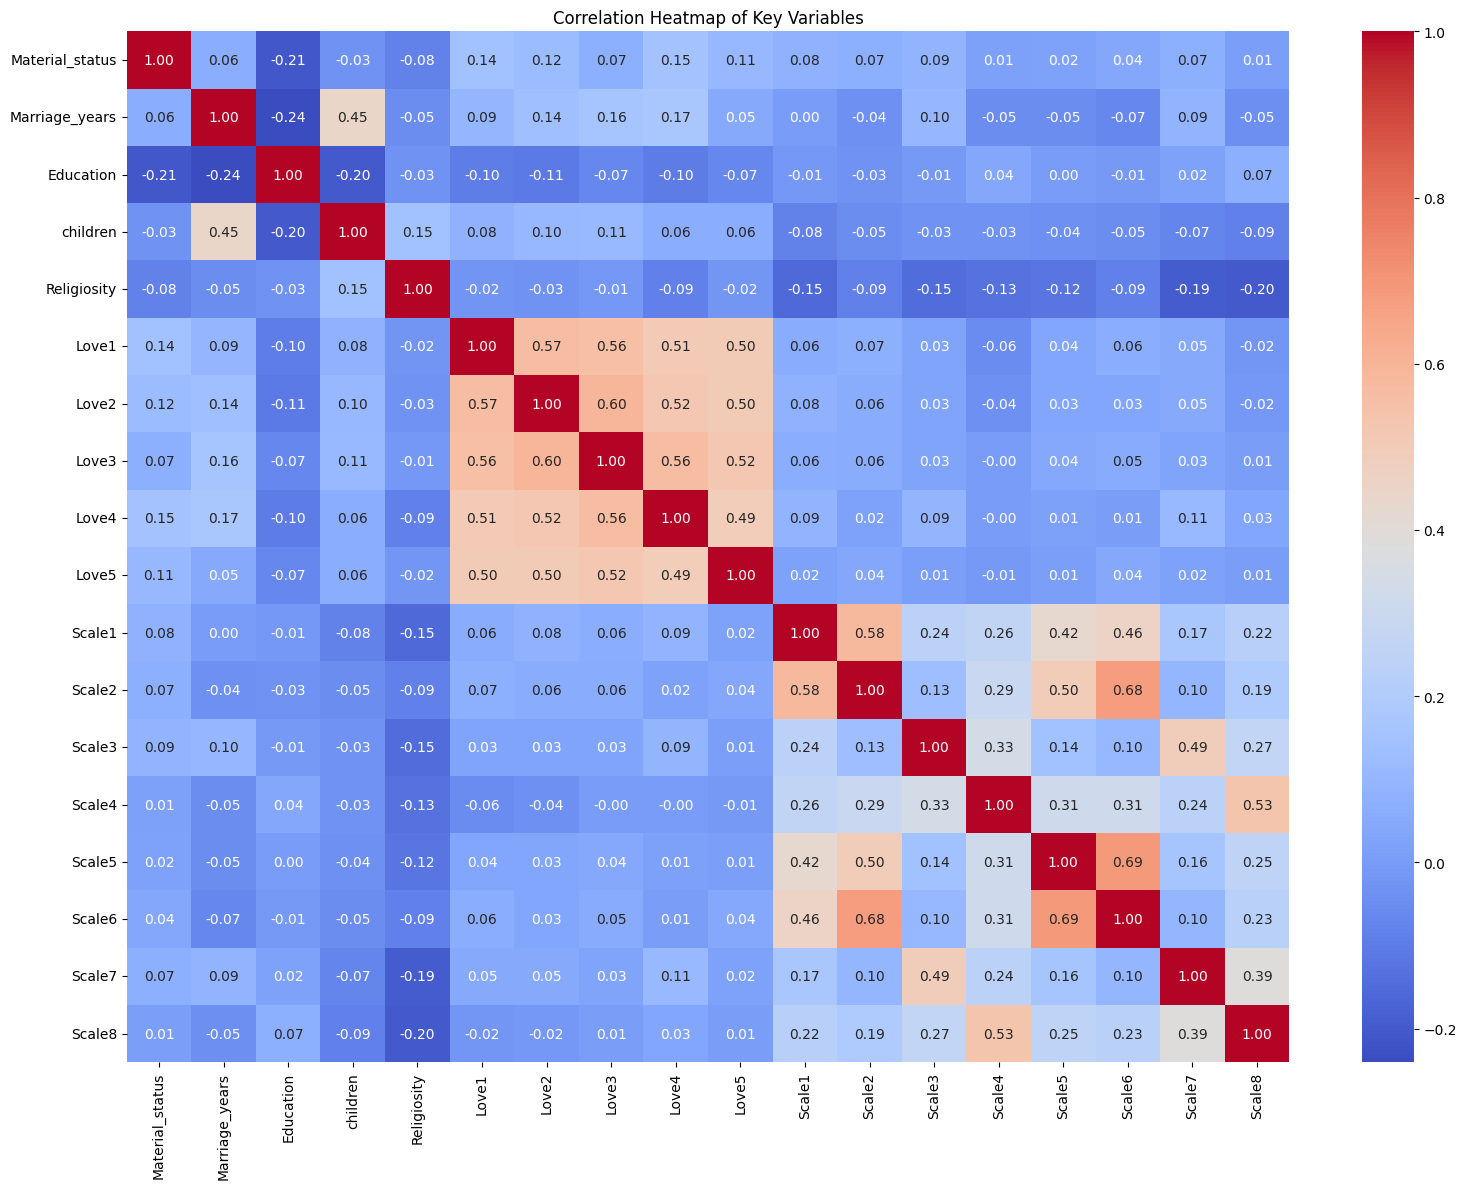

In [34]:
# Correlation Heatmap
selected = [
    "Material_status", "Marriage_years", "Education", "children", "Religiosity",
    "Love1", "Love2", "Love3", "Love4", "Love5", "Scale1", "Scale2", "Scale3", "Scale4", "Scale5", "Scale6", "Scale7", "Scale8"
]
plt.figure(figsize=(16, 12))
sns.heatmap(df[selected].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Key Variables")
plt.tight_layout()
plt.show()

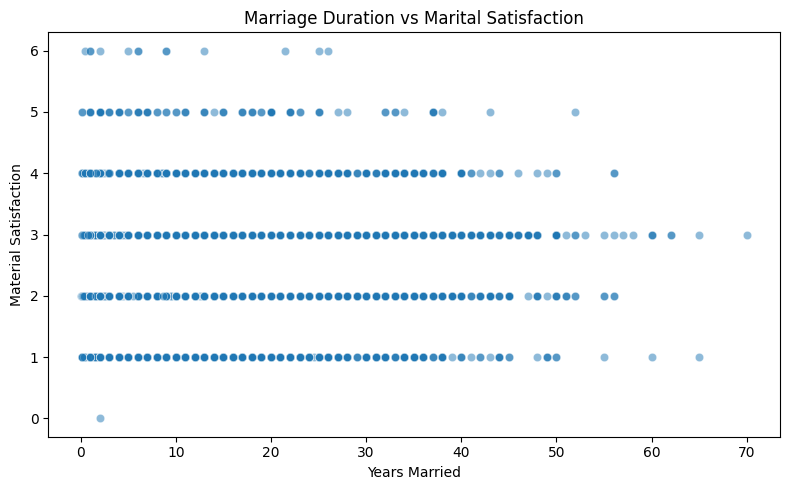

In [35]:
# Scatter: Marriage Years vs Marital Satisfaction
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Marriage_years", y="Material_status", data=df, alpha=0.5)
plt.title("Marriage Duration vs Marital Satisfaction")
plt.xlabel("Years Married")
plt.ylabel("Material Satisfaction")
plt.tight_layout()
plt.show()